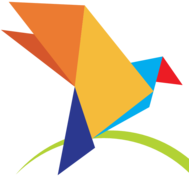

**Sklearn Linear Regression **bold text** VS  Pyomo Linear Regression**

**Install Pyomo**

**Install  ipopt**

In [1]:
# https://colab.research.google.com/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/01.02-Running-Pyomo-on-Google-Colab.ipynb#scrollTo=yTGBrqQO3vT2
!pip install pyomo
!wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

In [2]:
#https://realpython.com/linear-regression-in-python/
#https://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame

#**linear regression problem**

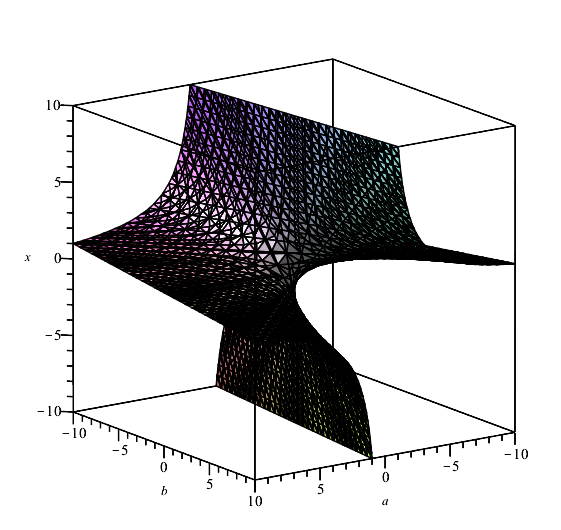

In [3]:
from pyomo.environ import *

#  linear regression problem
model = ConcreteModel()

# Define the input data
X = [1, 2, 3, 4, 5]
Y = [2, 4, 5, 4, 5]


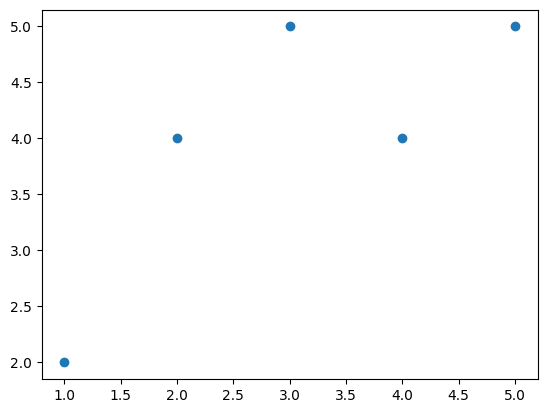

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.show()

In [5]:

# Define the variables
model.a = Var()
model.b = Var()

# Define the objective function
model.obj = Objective(expr=sum((Y[i] - model.a*X[i] - model.b)**2 for i in range(len(X))))

# Define the constraints (optional for linear regression)
# ...

# Solve the optimization problem
SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()

# Print the values of the estimated parameters
print("Estimated parameters:")
print("a =", model.a())
print("b =", model.b())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.005209922790527344
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Estima

In [6]:
x=[float(i) for i in X]

In [7]:
print(x)

[1.0, 2.0, 3.0, 4.0, 5.0]


**Import numpy**

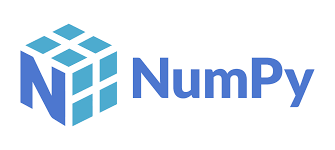

In [8]:
import numpy as np

In [9]:
per=np.array(x)*model.a()+model.b()

In [10]:
print(per)
print(Y)

[2.8 3.4 4.  4.6 5.2]
[2, 4, 5, 4, 5]


**Import MSE**

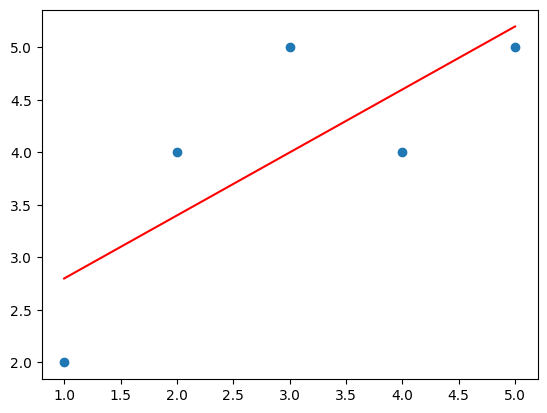

In [11]:

plt.scatter(x, Y)
plt.plot(x, per, color='red')
plt.show()

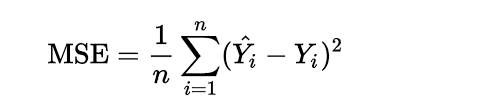

In [12]:
from sklearn.metrics import mean_squared_error as mse

In [13]:
mse(Y,per)


0.47999999999999987

**`Machine Learning With  Linear Regression`**

In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
regr = linear_model.LinearRegression()


In [15]:
import pandas as pd


**Import pandas**

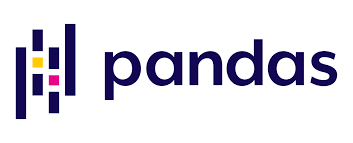

In [16]:
df = pd.DataFrame({"A":X,"B":Y})

In [17]:
data = np.asarray(df)

In [18]:
x1, y1 = data[:, 1:], data[:, 0]
regr.fit(x1, y1)

LinearRegression()

In [19]:
per=regr.predict(x1)

In [20]:
per

array([1., 3., 4., 3., 4.])

In [21]:

mse(per,y1)

0.8

In [22]:
regr.intercept_  , regr.coef_

(-1.0, array([1.]))

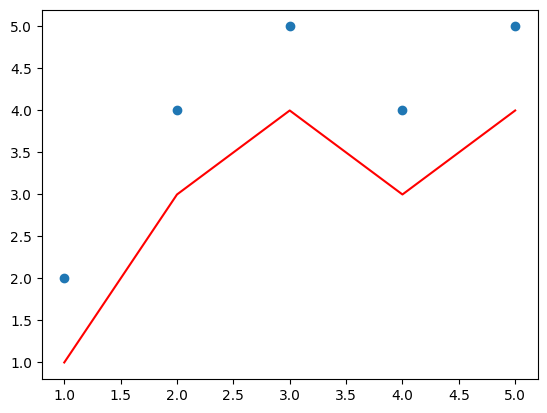

In [23]:

plt.scatter(x, Y)
plt.plot(x, per, color='red')
plt.show()

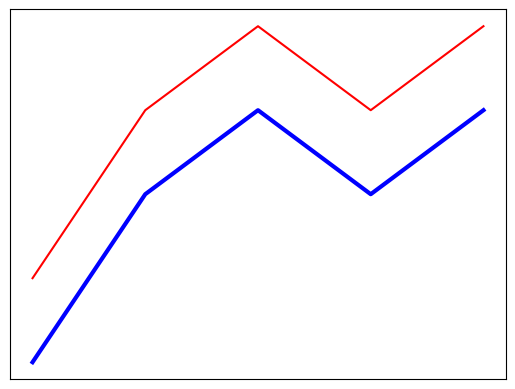

In [24]:

plt.plot(x, Y, color='red')
plt.plot(x, per, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()